In [45]:
import pandas as pd
import os
import pickle as pk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
results_path = '/home/joud/code/relu_analysis/dynn/src/notebooks/msdnet/results'
boosted_results_path = f'{results_path}/dynamic_boosted_300.txt'
msdnet_results_path = f'{results_path}/dynamic_not_boosted.txt'


In [46]:
dataset = 'cifar100'
boo_name = 'BoostedNet'
w_name = 'L2W-DEN'
our_name = 'ConfEE'

if dataset == 'cifar10':
    model = 't2t_7'
    long_name = 't2t_vit_7'
    total_mudaa = 13.4
    end_acc = 94.5
    lambda_val_1 = 0.1
    lambda_val_2 = 0.9
    end_plot_acc = 0.85*end_acc
    line_acc = end_acc*0.9
    line_acc_label =r'$90\%$ of end accuracy'
    L=7
elif dataset == 'cifar100':
    model = 't2t_14'
    long_name = 't2t_vit_14'
    total_mudaa = 56
    end_acc = 88.4
    L=14
    lambda_val_1 = 0.01
    lambda_val_2 = 0.9
    end_plot_acc = 0.4*end_acc
    line_acc = end_acc*0.7
    line_acc_label =r'$70\%$ of end accuracy'

path = '/home/joud/code/relu_analysis/dynn/src/notebooks/cifar100_t2t_14'
list_files = os.listdir(path)

list_dicts_ours = []
for file_name in list_files:

    if '.pk' in file_name and 'baseline' not in file_name and 'boosted' not in file_name and 'weighted' not in file_name:
        lambda_val = float(file_name.split('_')[-2])
        print(file_name)
        with open(os.path.join(path, file_name), 'rb') as file:
            dicts = pk.load(file)
        dicts['lambda'] = lambda_val
        list_dicts_ours.append(dicts)
        print(lambda_val)
        if lambda_val == lambda_val_1:
            our_point_to_display = dicts
            print('got point 1')
        if lambda_val == lambda_val_2:
            our_point2_to_display = dicts
            print('got point 2')

our_df = pd.DataFrame()
keys_we_want = ['test/acc_exit','test/total_cost', 'test/gated_acc', 'test/gated_ece', 'test/gated_ece']
def extract_metrics_we_want(metrics_dict, keys_we_want):
    metrics_we_want = {}
    for key, val in metrics_dict.items():
        if key in keys_we_want:
            metrics_we_want[key] = val
    return metrics_we_want

our_df = pd.DataFrame()
for metrics in list_dicts_ours:
    metrics_we_care_about = extract_metrics_we_want(metrics, keys_we_want)
    metrics_we_care_about['average_IC'] = np.mean(metrics_we_care_about['test/total_cost'])/total_mudaa
    metrics_we_care_about['average_ACC'] = np.mean(metrics_we_care_about['test/gated_acc'])
    metrics_we_care_about['ACC'] = metrics_we_care_about['test/gated_acc']

    metrics_we_care_about['ECE'] =metrics_we_care_about['test/gated_ece']

    df = pd.DataFrame(data=metrics_we_care_about)

    our_df = pd.concat([df, our_df],axis=0, ignore_index=True)

09-22-2023_cifar100_t2t_vit_14_2.0_results.pk
2.0
09-19-2023_cifar100_1.5_results.pk
1.5
09-22-2023_cifar100_t2t_vit_14_0.9_results.pk
0.9
got point 2
09-22-2023_cifar100_t2t_vit_14_5.0_results.pk
5.0
09-20-2023_cifar100_2.1_results.pk
2.1
09-21-2023_cifar100_t2t_vit_14_0.5_results.pk
0.5
09-21-2023_cifar100_0.01_results.pk
0.01
got point 1
09-20-2023_cifar100_0.9_results.pk
0.9
got point 2
09-20-2023_cifar100_0.55_results.pk
0.55
09-20-2023_cifar100_3.0_results.pk
3.0
09-21-2023_cifar100_t2t_vit_14_2.8_results.pk
2.8
09-20-2023_cifar100_1.0_results.pk
1.0
09-21-2023_cifar100_t2t_vit_14_0.8_results.pk
0.8
09-21-2023_cifar100_t2t_vit_14_1.5_results.pk
1.5
09-20-2023_cifar100_10.0_results.pk
10.0
09-20-2023_cifar100_4.0_results.pk
4.0
09-21-2023_cifar100_t2t_vit_14_0.6_results.pk
0.6
09-19-2023_cifar100_0.8_results.pk
0.8
09-22-2023_cifar100_t2t_vit_14_1.0_results.pk
1.0
09-21-2023_cifar100_t2t_vit_14_3.0_results.pk
3.0
09-20-2023_cifar100_2.5_results.pk
2.5
09-21-2023_cifar100_t2t_vit_1

In [51]:
boosted = pd.read_csv(boosted_results_path)
msdnet = pd.read_csv(msdnet_results_path)
boosted['MAC'] = boosted['MAC'] / 1e7
msdnet['MAC'] = msdnet['MAC'] / 1e7
# print(boosted)
print(our_df)
our_df['acc'] = our_df['average_ACC']
our_df['MAC'] = our_df['test/total_cost'] / 10
our_df['method'] = 'confEE'

     test/gated_acc  test/gated_ece  test/total_cost  test/acc_exit  \
0         42.800000       25.617172        15.044630      84.707692   
1         41.450000       25.185129        15.059585      85.442308   
2         41.166667       25.141157        15.093484      85.415385   
3         41.200000       25.036665        15.080523      85.467308   
4         40.980000       24.870143        15.110433      85.530769   
..              ...             ...              ...            ...   
235       78.250000       18.599782        25.134843      90.041026   
236       78.428571       18.843793        25.115402      90.058242   
237       78.425000       18.715051        25.155407      90.057692   
238       78.655556       18.876936        25.154617      90.104274   
239       78.830000       18.924308        25.152191      90.129231   

     average_IC  average_ACC        ACC        ECE        acc         MAC  \
0      0.269455    41.195964  42.800000  25.617172  41.195964  150.446

          MAC        acc         method  test/gated_acc  test/gated_ece  \
0    1.550512  65.840000  BoostedMSDNet             NaN             NaN   
1    1.593338  66.390000  BoostedMSDNet             NaN             NaN   
2    1.646003  67.260000  BoostedMSDNet             NaN             NaN   
3    1.711672  67.970000  BoostedMSDNet             NaN             NaN   
4    1.781369  68.620000  BoostedMSDNet             NaN             NaN   
..        ...        ...            ...             ...             ...   
313  2.513484  78.405079         confEE       78.250000       18.599782   
314  2.511540  78.405079         confEE       78.428571       18.843793   
315  2.515541  78.405079         confEE       78.425000       18.715051   
316  2.515462  78.405079         confEE       78.655556       18.876936   
317  2.515219  78.405079         confEE       78.830000       18.924308   

     test/total_cost  test/acc_exit  average_IC  average_ACC        ACC  \
0                NaN    

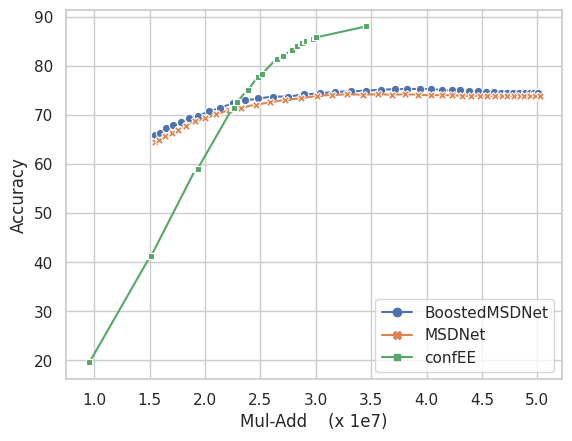

In [52]:
sns.set(font_scale=1.5)
sns.set_theme(style="whitegrid")
boosted['method'] = "BoostedMSDNet"
msdnet['method'] = "MSDNet"
combined_df = pd.concat([boosted, msdnet, our_df],axis=0, ignore_index=True)
print(combined_df)
sns.lineplot(data=combined_df, x="MAC", y="acc", hue="method", style="method",
             markers=True, dashes=False)
# plt.axhline(y=line_acc, color='k',linestyle='--', label=line_acc_label)
# plt.plot(boosted['MAC'], boosted['acc'], color='r', label='boosted')
# plt.plot(msdnet['MAC'], msdnet['acc'], color='b', label='msdnet')
plt.xlabel("Mul-Add    (x 1e7)")
plt.ylabel("Accuracy")
plt.legend()
# x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
# plt.xlabel(x_string)
# plt.ylabel('Accuracy')
# plt.tight_layout()
# plt.savefig('perf_cost_'+dataset+'.pdf')